# CAB420, Regression, Additional Example: Regression Diagnoistics, Various Plots and their Meanings
Dr Ethan Goan (e.goan@qut.edu.au), Dr Simon Denman (s.denman@qut.edu.au)

## Overview

Residuals, and the various plots of them, often cause some confusion. In this additional example, we're going to look at some toy scenarious and see what the regression diagnostics plots can look like for the various toy scenarios.

We will stress that this is all just made up toy models and data, but should hopefully this should illustrate what these plots can look like, and how that can relate to the what's in the actual data.

Three of the main assumptions that we are looking for with an OLS model are
1. The residuals are normally distributed
2. There is actually a linear relationship between predictors and our response
3. there is constant variance in our residuals

There are other assumptions that go into linear regression models, but these are probably the main ones, and the ones that we've consider here.

Lets see how different plots can help us identify if these assumptions are being violated.

Again, the data is totally made up. This example really is just all about highlighting some ways to use the diagnostic plots to identify some of this stuff.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Scenario 1: An ideal scenario

Lets have a look at the diagnostic plots when eveything is ideal.

In [2]:
# get some x values
x = np.linspace(0, np.pi * 0.5, 1000)

In [3]:
# seeding random number generator so get consistent results across consecutive runs
np.random.seed(1)

# true line is y = x, add a small amount of noise to get some data to fit
y1 = x + np.random.randn(*x.shape) * 0.1

# fit OLS model
# note we're not adding a constant here, as our equation is y = x, so the constant is 0
ols = sm.OLS(y1, x)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          8.581e+04
Date:                Mon, 29 Jan 2024   Prob (F-statistic):                        0.00
Time:                        22:06:51   Log-Likelihood:                          902.36
No. Observations:                1000   AIC:                                     -1803.
Df Residuals:                     999   BIC:                                     -1798.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0027      0.003    292.930      0.000       0.996       1.009
==============================================================================
Omnibus:                        3.022   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                3.096
Skew:                          -0.068   Prob(JB):                        0.213
Kurtosis:                       3.236   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

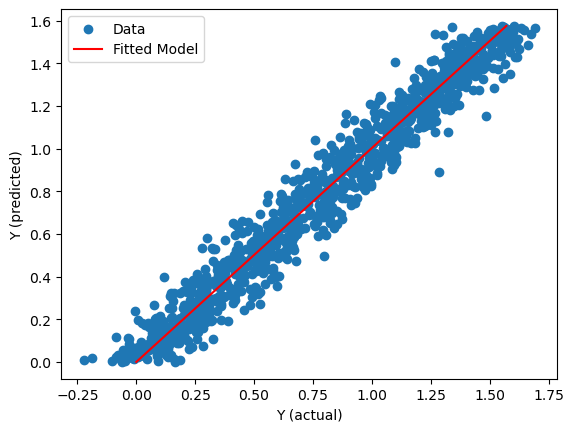

In [4]:
def plot_fit(x, y, y_pred):
    plt.scatter(y, y_pred, label="Data")
    plt.xlabel('Y (actual)')
    plt.ylabel('Y (predicted)')
    plt.plot(x, y_pred, c='red', label="Fitted Model")
    plt.legend()

plot_fit(x, y1, model.predict(x))

Our fitted model goes right down the middle of the data. The relationship looks pretty linear. This is what we'd expect, as we've just got a noisy approximation of the true relationship.

Let's check out the residuals now.

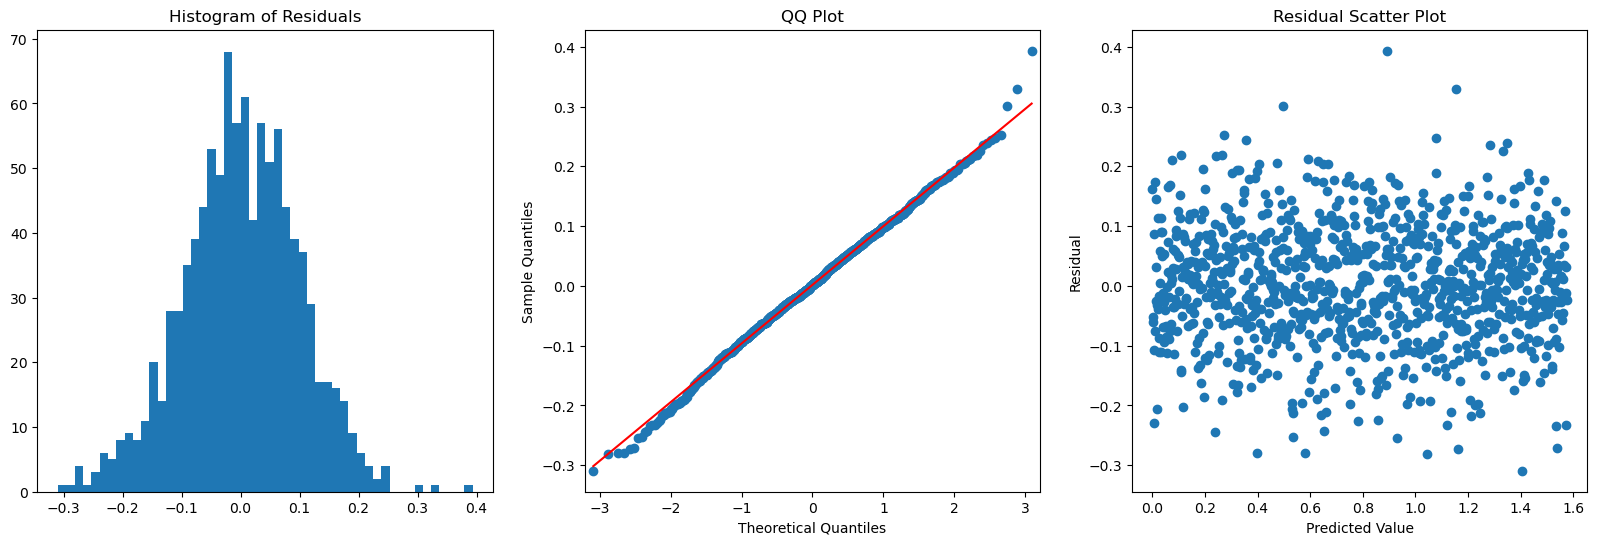

In [5]:
def plot_resid(resid, pred):
    fig = plt.figure(figsize=[20, 6])
    ax = fig.add_subplot(1, 3, 1)
    ax.hist(resid, bins=50)
    ax.set_title('Histogram of Residuals')
    
    ax = fig.add_subplot(1, 3, 2)
    sm.qqplot(np.squeeze(resid), line='s', ax=ax)
    ax.set_title('QQ Plot')

    ax = fig.add_subplot(1, 3, 3)
    plt.scatter(pred, resid)
    ax.set_xlabel('Predicted Value')
    ax.set_ylabel('Residual')
    ax.set_title('Residual Scatter Plot')
    
plot_resid(model.resid, model.predict(x))

The distribution of residuals is looking pretty normal.

Q-Q plot also looks really good, meaning residuals are approximately normally distributed.

Finally, there is no clear trend in the scatter plot of residuals, meaning it is looking pretty likely and that our main assumptions have been satisfied. 

Lets take a look at some scenarios when this is not the case.

# Scenario 2: Our Data is Non-Linear

Lets have a look at what our diagnostics plots look like when our data is non-linear. For this, we will use 1/4 of a sine wave and fit a linear model to it.

In [6]:
# seeding random number generator so get consistent results
np.random.seed(1)
y2 = np.sin(x) + np.random.randn(*x.shape) * 0.02

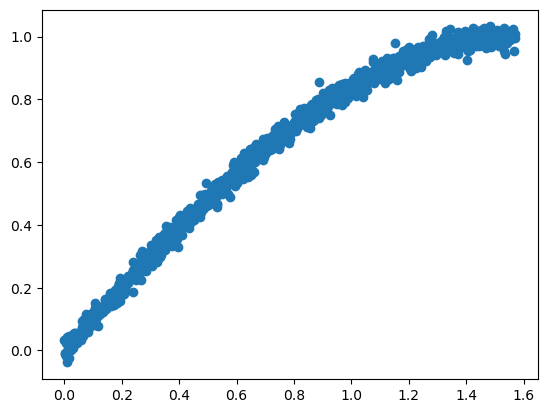

In [7]:
plt.scatter(x, y2)

From the above, we can see that the relationship between x and y is non-linear. Linear regression may not go so well.

In [8]:
x_c = sm.add_constant(x)
ols = sm.OLS(y2, x_c)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                 2.092e+04
Date:                Mon, 29 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:06:52   Log-Likelihood:                 1302.5
No. Observations:                1000   AIC:                            -2601.
Df Residuals:                     998   BIC:                            -2591.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1161      0.004     27.896      0.000       0.108       0.124
x1             0.6636      0.005    144.650      0.000       0.655       0.673
==============================================================================
Omnibus:                       74.660   Durbin-Watson:                   0.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.399
Skew:                          -0.538   Prob(JB):                     1.71e-14
Kurtosis:                       2.398   Cond. No.                         3.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Plotting the Predictions and Diagnostics

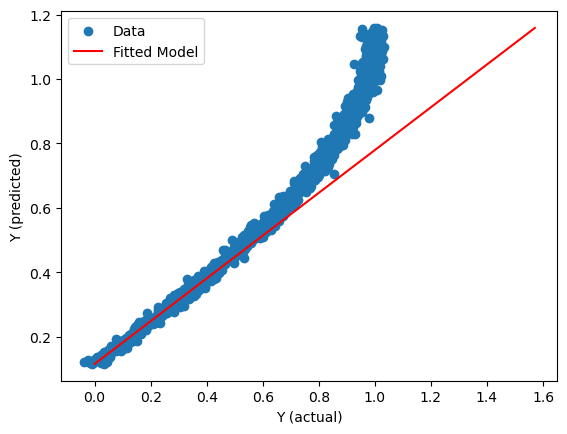

In [9]:
plot_fit(x, y2, model.predict(x_c))

The predictions don't look so crash hot. Our fitted model does not follow the data. This is expected though, as we have non-linear data.

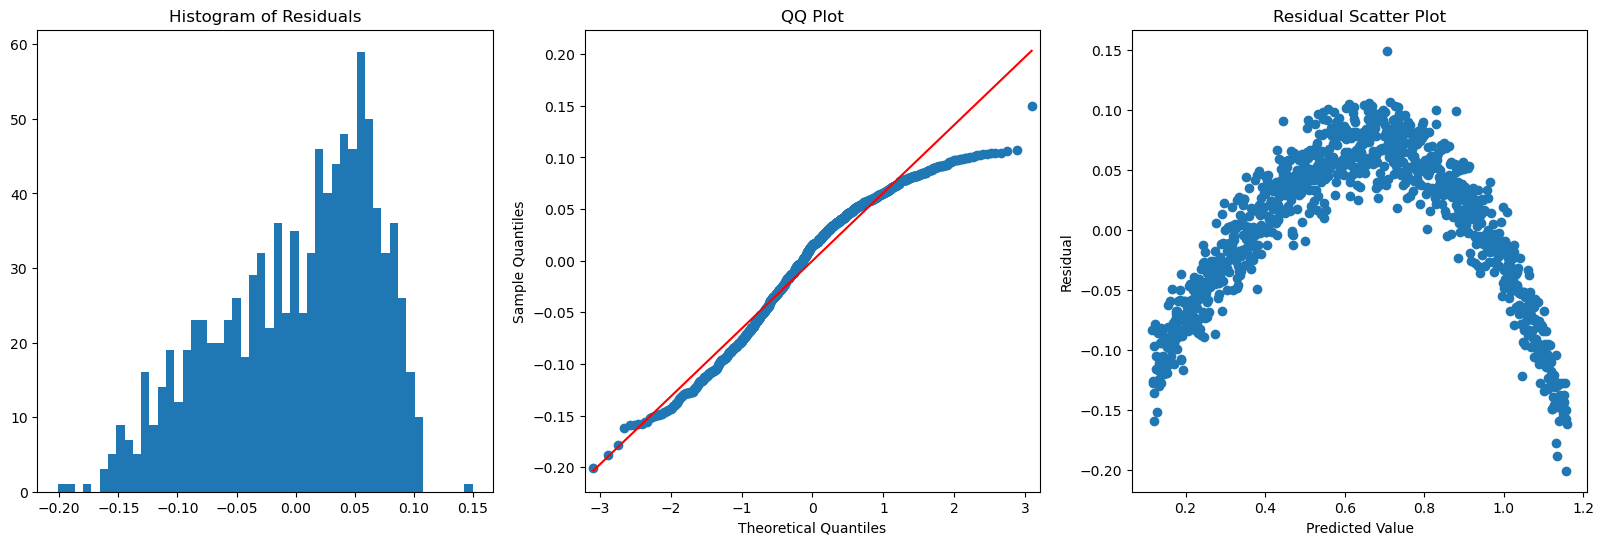

In [10]:
plot_resid(model.resid, model.predict(x_c))

The histrogram looks like it is skewed and maybe even bimodal (has two peaks). It certainly doesn't look like a normal distribution. The Q-Q plot doesnt look terrible, but we can see it diverging in the tails of the distribution.

The scatter plot of the residuals is showing a clear trend or pattern in the residuals of our data, indicating that there is a non-linear relationship between our predictor variables and response variables (which is exactly the case by design).

# Scenario 3: Non-constant Variance

An assumption of OLS models is that our residuals or error has constant variance. Lets see what our plots look like when that is the case (and what that means in terms of the data).

In [11]:
# seeding random number generator so get consistent results
np.random.seed(1)

a = 1
b = 0

y3 = a * x + b + np.random.randn(*x.shape) * x 

x_c = sm.add_constant(x)
ols = sm.OLS(y3, x_c)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     274.8
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           1.07e-54
Time:                        22:06:52   Log-Likelihood:                -1285.5
No. Observations:                1000   AIC:                             2575.
Df Residuals:                     998   BIC:                             2585.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0134      0.055      0.242      0.809      -0.095       0.122
x1             1.0116      0.061     16.576      0.000       0.892       1.131
==============================================================================
Omnibus:                       80.860   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              343.821
Skew:                          -0.238   Prob(JB):                     2.19e-75
Kurtosis:                       5.833   Cond. No.                         3.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We'll start by fitting our model. We can see that the fitted model does follow the data, but we have more outliers and/or larger errors for larger values of y.

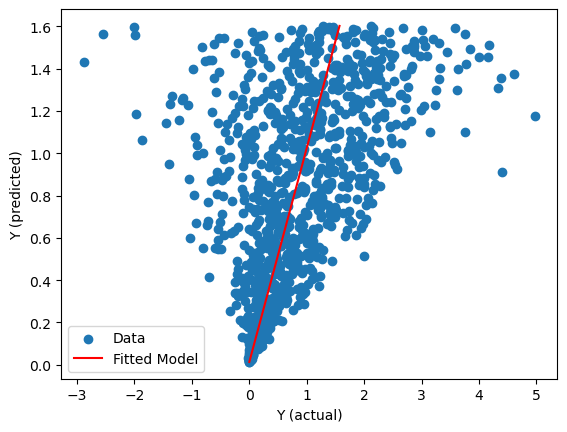

In [12]:
plot_fit(x, y3, model.predict(x_c))

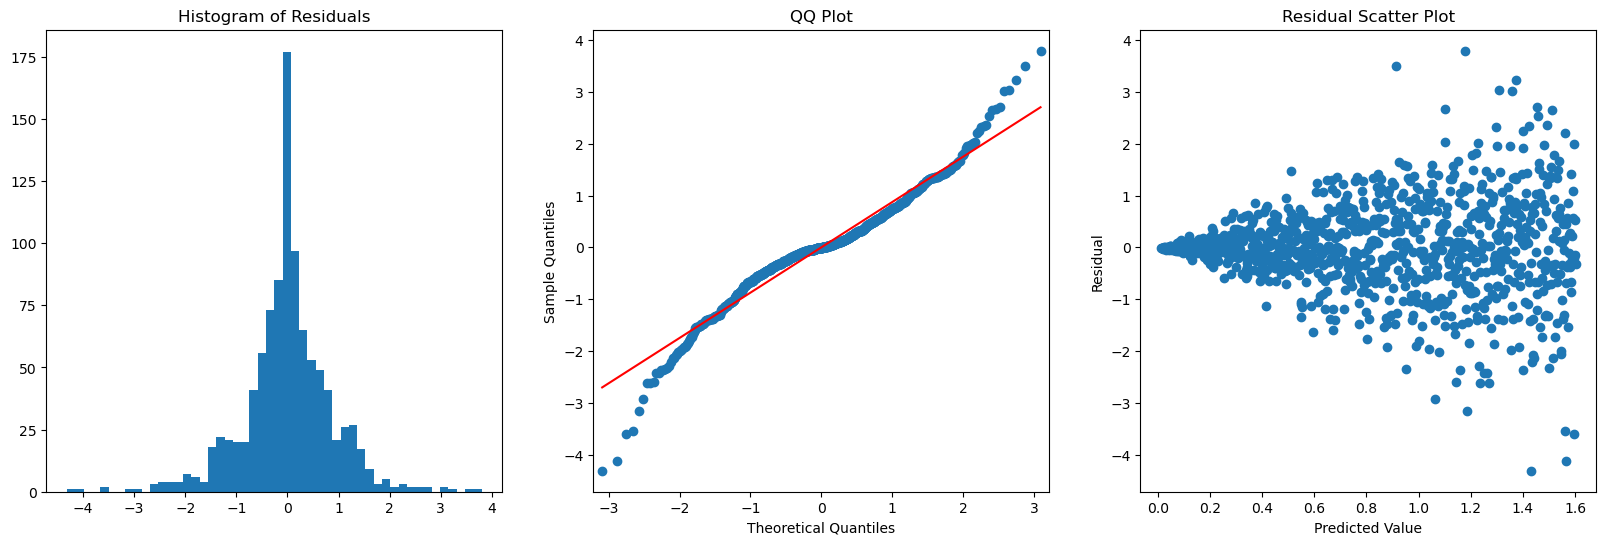

In [13]:
plot_resid(model.resid, model.predict(x_c))

Considering the residuals now, the histogram of residuals is unimodal around zero, and looks Gaussian-ish, but the shape is not quite right and the tails look a bit weird. The QQ-plot shows similar weirdness in the tails. We can see the model roughly follows the expected trend in the middle of the plot, but the tails are skewed. Consider for a moment what these skewed values mean. Focussing on the bottom left of the plot, when the theoretical quantile is -3 (3 standard deviations below the mean), we're observing a sample quantile of -4, i.e. an extra standard deviation away from the mean. We're seeing the same thing in the top right, with theoretical quantiles of 3 having a sample quantile of 4. What this essentially means is that the errors are larger than we expect, and certainly larger than we'd see if there really was a Gaussian distribution of residuals. 

Considering the scatter plot of the residuals now, this is showing a clear pattern where it is fanning out, meaning that the variance in our residuals is increasing as our predicted value increases. This is indicating non-constant variance, meaning that assumption has been violated. This non-linearity means that our model is increasingly inaccurate when predicting larger values, leading to larger errors than we'd expect, and the skew in the QQ-plot.